### Visual II. 2D phase diagram showing the end distances of swarms

In [158]:
import numpy as np
import glob2
import matplotlib.pyplot as plt
import os
import json
import itertools


In [103]:
# Four params and their values, each is a np array
queen_bee_concentrations = np.linspace(0.01, 0.5, 4)
worker_bee_concentrations = np.linspace(0.005, 0.5, 4)
diffusion_coefficients = np.linspace(0.05, 0.5, 4)
worker_bee_thresholds = np.linspace(0.001, 0.005, 4)

In [104]:
queen_bee_concentrations

array([0.01      , 0.17333333, 0.33666667, 0.5       ])

In [111]:
worker_bee_concentrations

array([0.005, 0.17 , 0.335, 0.5  ])

#### Get avg of the 10 replicate swarms' end avg distance from queen

In [106]:
# Get names of the 256 json's
# json_list = list(map(lambda x : x.split("/")[-1], glob2.glob("avg_distance_data/Q0.01_W0.005_D0.05_T0.001.json")))
json_list = list(map(lambda x : x.split("/")[-1], glob2.glob("avg_distance_data/*.json")))
type(json_list[0])

str

In [90]:
def split_filename(json_list):
    for k in json_list:
        start_char = "j"
        k_new = k[:k.index(start_char)-1]
        print(k_new.split("_"))

In [91]:
split_filename(json_list)

['Q0.01', 'W0.005', 'D0.05', 'T0.001']


Each tile is the average over 160 swarms of those parameters. 

In [127]:
# # For a pair of params
# for i in range(len(json_list)):
#     for q in queen_bee_concentrations:
#         #print(q)
#         for w in worker_bee_concentrations:
#             print(w)
# #             if (json_list[i].find(str(q)) != -1) and (json_list[i].find(str(w)) != -1):
# #                 print(json_list[i])
# #                 print(q, w)

# Get matching json filenames

In [134]:
def get_matching_filenames(json_list, param_1, param_2, value_1, value_2):
    matching_json_names = []
    for i in range(len(json_list)):
        if (json_list[i].find(param_1+str(value_1)) != -1) and (json_list[i].find(param_2+str(value_2)) != -1):
            matching_json_names.append(json_list[i])
    
    return matching_json_names
    
names = get_matching_filenames(json_list, "Q", "W", 0.01, 0.005)
print(names)

['Q0.01_W0.005_D0.05_T0.001.json', 'Q0.01_W0.005_D0.05_T0.002333333333333333.json', 'Q0.01_W0.005_D0.05_T0.0036666666666666666.json', 'Q0.01_W0.005_D0.05_T0.005.json', 'Q0.01_W0.005_D0.2_T0.001.json', 'Q0.01_W0.005_D0.2_T0.002333333333333333.json', 'Q0.01_W0.005_D0.2_T0.0036666666666666666.json', 'Q0.01_W0.005_D0.2_T0.005.json', 'Q0.01_W0.005_D0.35_T0.001.json', 'Q0.01_W0.005_D0.35_T0.002333333333333333.json', 'Q0.01_W0.005_D0.35_T0.0036666666666666666.json', 'Q0.01_W0.005_D0.35_T0.005.json', 'Q0.01_W0.005_D0.5_T0.001.json', 'Q0.01_W0.005_D0.5_T0.002333333333333333.json', 'Q0.01_W0.005_D0.5_T0.0036666666666666666.json', 'Q0.01_W0.005_D0.5_T0.005.json']


# Load those 16 files: get end values of 160 lists

In [148]:
def get_ending_distances(json_file):
    # Get the 10 ending values of a single json
    with open("avg_distance_data/" + json_file, "r") as f:
        data = json.load(f)
        # print(data)
        
    # For 1 JSON of 10 replicate swarms: going through its 10 lists
    dist_list = []
    for i in range(len(data)):
        ending_dist = data[i][-1]
        dist_list.append(ending_dist)
    return dist_list

In [170]:
def get_mean_var(json_list, param_1, param_2, value_1, value_2):

    # Load in a json list and get ending value of each list, then average and variance those 160 values
    
    param_pair_distances = []
    # print(len(param_pair_distances))
    # print(param_pair_distances[0])

    names = get_matching_filenames(json_list, param_1, param_2, value_1, value_2)

    for n in names:
        # print(n)
        distance_lists = get_ending_distances(n)
        param_pair_distances.append(distance_lists)

    # Merge lists in param_pair_distances
    merged = list(itertools.chain.from_iterable(param_pair_distances))
    # print(merged)
    merged_mean = np.mean(merged)
    print(merged_mean)
    merged_var = np.var(merged)
    print(merged_var)

In [171]:
get_mean_var(json_list, "Q", "W", 0.01, 0.005)

1.8924136729503638
1.7028258166431791


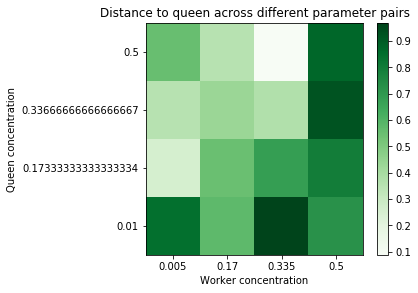

In [62]:
# Sample plotting 
swarm_end_distance = np.random.random((4, 4))

fig, ax = plt.subplots()
#im = ax.imshow(swarm_end_distance)

# We want to show all ticks...
ax.set_xticks(np.arange(len(worker_concentration)))
ax.set_yticks(np.arange(len(queen_concentration)))
# ... and label them with the respective list entries
ax.set_xticklabels(worker_concentration)
ax.set_yticklabels(queen_concentration)

heatmap = ax.pcolor(swarm_end_distance, cmap=plt.cm.Greens)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(swarm_end_distance.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(swarm_end_distance.shape[1])+0.5, minor=False)

ax.set_xlabel('Worker concentration')
ax.set_ylabel('Queen concentration')

fig.colorbar(heatmap)
fig.tight_layout()
plt.title('Distance to queen across different parameter pairs')
plt.show()